## Code to load BraTS 2018 data
Work in progress

In [3]:
# source: https://github.com/Lafite-Yu/BraTS_2018_U-Net/blob/master/dataset.py

import random

import gc
import os
import pickle

import nibabel as nib
import numpy as np
# import tensorlayer as tl

"""
In seg file
--------------
Label 1: necrotic and non-enhancing tumor
Label 2: edemaÂ 
Label 4: enhancing tumor
Label 0: background

MRI
-------
whole/complete tumor: 1 2 4
core: 1 4
enhance: 4
"""
###============================= SETTINGS ===================================###
DATA_SIZE = 'small'  # (small, half or all)

save_dir = "/scratch1/sachinsa/brats_seg/train_dev/"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

data_root_dir = '/scratch1/ajoshi/BRATS2018'

HGG_data_path = f"{data_root_dir}/Training/HGG"
LGG_data_path = f"{data_root_dir}/Training/LGG"
survival_csv_path = f"{data_root_dir}/Training/survival_data.csv"
###==========================================================================###


In [11]:
def load_folder_list(directory_path):
    return [os.path.join(directory_path, name) for name in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, name))]

HGG_path_list = load_folder_list(HGG_data_path)
LGG_path_list = load_folder_list(LGG_data_path)
print(len(HGG_path_list), len(LGG_path_list))

print(HGG_path_list[:4])

HGG_name_list = [os.path.basename(p) for p in HGG_path_list]
HGG_name_list[:4]

210 75
['/scratch1/ajoshi/BRATS2018/Training/HGG/Brats18_CBICA_AQT_1', '/scratch1/ajoshi/BRATS2018/Training/HGG/Brats18_TCIA01_186_1', '/scratch1/ajoshi/BRATS2018/Training/HGG/Brats18_TCIA03_375_1', '/scratch1/ajoshi/BRATS2018/Training/HGG/Brats18_CBICA_ASU_1']


['Brats18_CBICA_AQT_1',
 'Brats18_TCIA01_186_1',
 'Brats18_TCIA03_375_1',
 'Brats18_CBICA_ASU_1']

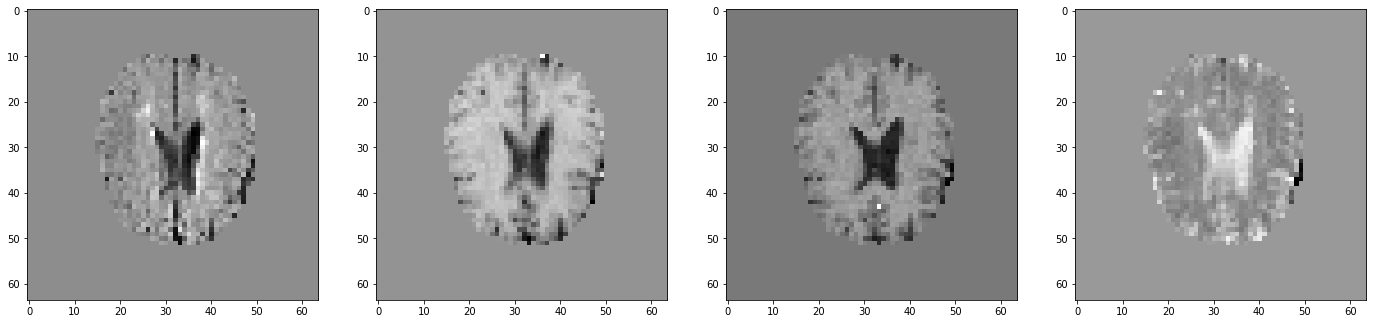

In [38]:
# import matplotlib.pyplot as plt

# device = torch.device("cuda:0")
# this_input = all_dataset[0]
# input_image = this_input["image"].unsqueeze(0).to(device)

# plt.figure("image", (24, 6))
# for index in range(4):
#     brain_slice = input_image[0, index, :, :, 36]
#     brain_slice = brain_slice.detach().cpu().T
#     plt.subplot(1, 4, index + 1)
#     plt.imshow(brain_slice, cmap="gray")